 # Simple Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,16.520000,17.219999,16.370001,16.650000,16.650000,62933100
2018-12-26,16.879999,17.910000,16.030001,17.900000,17.900000,108811800
2018-12-27,17.430000,17.740000,16.440001,17.490000,17.490000,111373000
2018-12-28,17.530001,18.309999,17.139999,17.820000,17.820000,109214400
2018-12-31,18.150000,18.510000,17.850000,18.459999,18.459999,84732200


### Multiple Features

In [4]:
X = dataset.drop(['Adj Close','Close'], axis=1)
y = dataset[['Adj Close']]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [6]:
lr = LinearRegression()
lr.fit(X_train[['Open']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_pred = lr.predict(X_test[['Open']])
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
print('R²: %.4f' % r2_score(y_test, y_pred))

Mean squared error: 0.0486
R²: 0.9977


In [8]:
print('Slope: ',lr.coef_)
print('Intercept: ',lr.intercept_)

Slope:  [[ 0.99710284]]
Intercept:  [ 0.01299775]


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print('Slope: ',lr.coef_)
print('Intercept: ',lr.intercept_)

Slope:  [[ -6.29642205e-01   8.05689978e-01   8.25362832e-01  -6.69728634e-11]]
Intercept:  [-0.00183821]


In [11]:
y_pred = lr.predict(X_test)
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
print('R²: %.4f' % r2_score(y_test, y_pred))

Mean squared error: 0.0131
R²: 0.9994


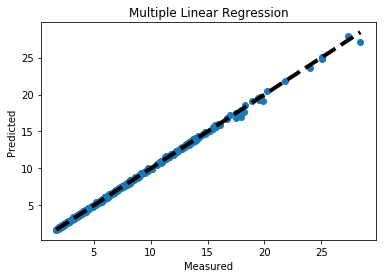

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_title('Multiple Linear Regression')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [13]:
from sklearn import metrics

print("Explained Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Explained Variance Score:  0.999386585233
Mean Absolute Error: 0.0638645212984
Mean Squared Error: 0.0130646322213
Root Mean Squared Error: 0.114300622139
